In [59]:
    import matplotlib.pyplot as plt
    import csv
    import numpy as np
    from matplotlib.backends.backend_pdf import PdfPages
    %matplotlib inline


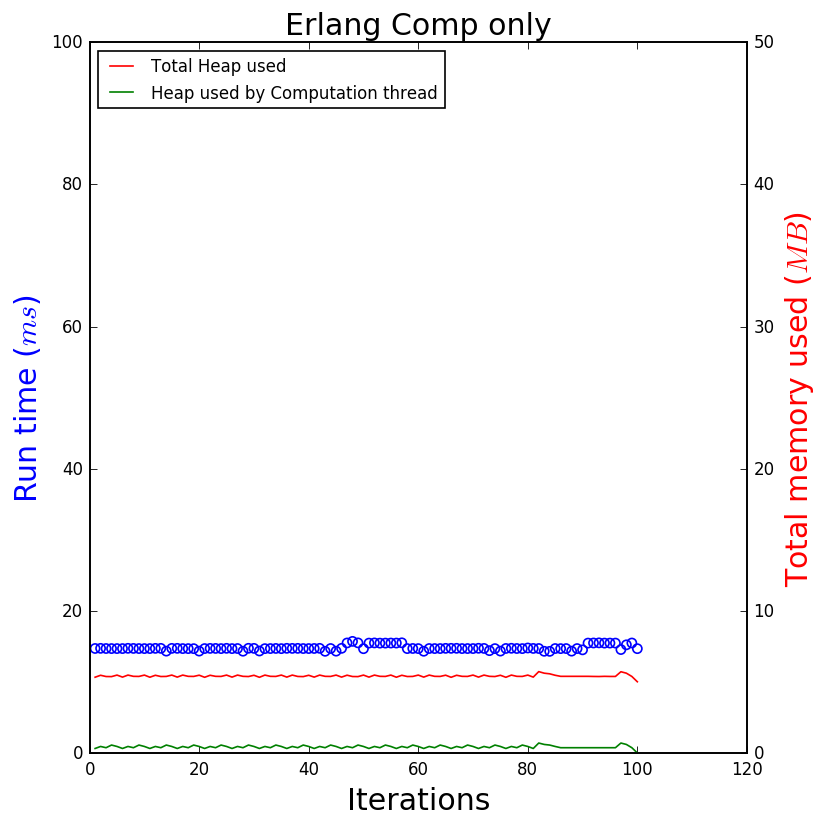

In [60]:
iteration, time , totalmemory,compmemory = np.loadtxt('/home/bhargav/Desktop/comp.txt', delimiter=':', unpack=True)


iteration = [h for h in iteration]
totalmemory = [float(f/1000000) for f in totalmemory]
compmemory = [float(f/1000000) for f in compmemory]
time = [t/1000 for t in time]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

ax1.set_ylabel("Run time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Iterations",fontsize=18)
ax1.set_ylim([0,100])

ax2.set_ylabel("Total memory used ($MB$)",color = 'red',fontsize=18)
ax2.set_xlabel("Iterations",fontsize=18)
ax2.set_ylim([0,50])

p1 = ax1.scatter(iteration[::1],time[::1],s=30,facecolors='none',edgecolors='b',label = 'Time to allocate large array')

p2,= ax2.plot(iteration[::1],totalmemory[::1] , label='Total Heap used' ,color = 'red')

p3,= ax2.plot(iteration[::1],compmemory[::1] , label='Heap used by Computation thread' ,color = 'green')


plt.title('Erlang Comp only',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2,p3]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)
l
name = "erlang_componly"

#plt.savefig(name)

pp = PdfPages("{}.pdf".format(name))
pp.savefig(fig)
pp.close()


plt.show()

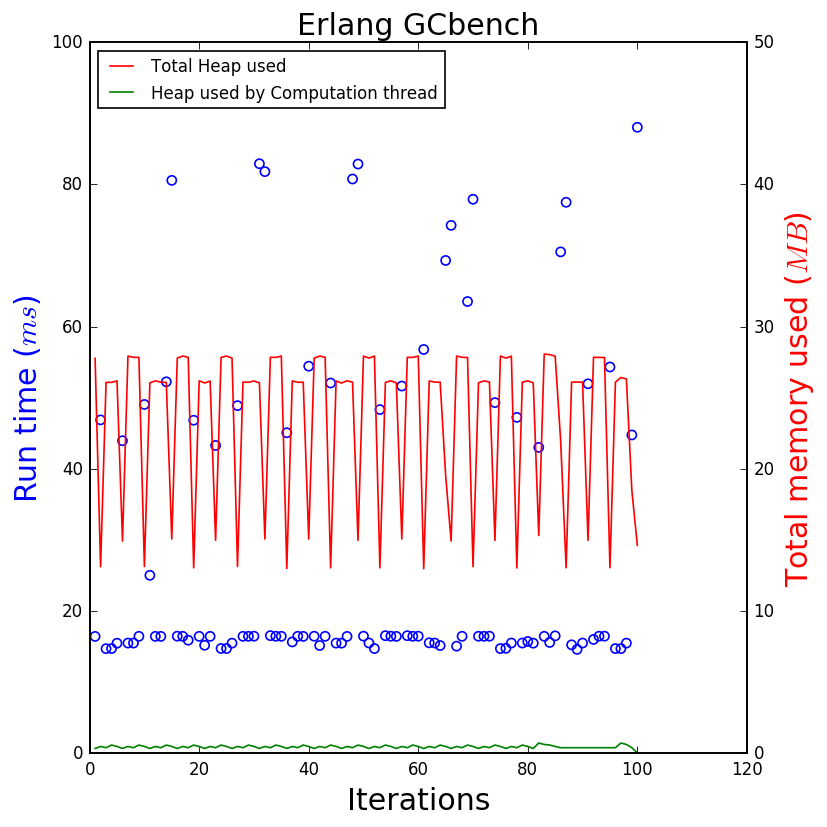

In [61]:
iteration, time , totalmemory,compmemory = np.loadtxt('/home/bhargav/Desktop/gcb.txt', delimiter=':', unpack=True)


iteration = [h for h in iteration]
totalmemory = [float(f/1000000) for f in totalmemory]
compmemory = [float(f/1000000) for f in compmemory]
time = [t/1000 for t in time]
fig,ax1 = plt.subplots(dpi=120, figsize=(7,7))
ax2 = plt.twinx()

ax1.set_ylabel("Run time ($ms$)",color = 'blue',fontsize=18)
ax1.set_xlabel("Iterations",fontsize=18)
ax1.set_ylim([0,100])

ax2.set_ylabel("Total memory used ($MB$)",color = 'red',fontsize=18)
ax2.set_xlabel("Iterations",fontsize=18)
ax2.set_ylim([0,50])

p1 = ax1.scatter(iteration[::1],time[::1],s=30,facecolors='none',edgecolors='b',label = 'Time to allocate large array')

p2,= ax2.plot(iteration[::1],totalmemory[::1] , label='Total Heap used' ,color = 'red')

p3,= ax2.plot(iteration[::1],compmemory[::1] , label='Heap used by Computation thread' ,color = 'green')


plt.title('Erlang GCbench',fontsize=18)

from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

#plt.fill([30000,42000,42000,30000],[0,0,20000,20000],'b',alpha=0.05)

lines =[p2,p3]

plt.legend(lines,[l.get_label() for l in lines],prop = fontP ,loc =2)
l
name = "erlang_gcb"

#plt.savefig(name)

pp = PdfPages("{}.pdf".format(name))
pp.savefig(fig)
pp.close()


plt.show()